In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from Dipper_Project_Functions import plotparams
from Dipper_Project_Functions import read_lightcurve_csv
from Dipper_Project_Functions import custom_id
import scipy
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.time import Time
from astropy.timeseries import LombScargle as ls
from scipy.optimize import curve_fit
import heapq

In [2]:
asassn_id = 352187470767		
ra_val = 134.56485
dec_val = -43.16532

target_id = custom_id(ra_val,dec_val)
print(target_id)

J085816$-$430955


In [3]:
colors = ["#6b8bcd", "#b3b540", "#8f62ca", "#5eb550", "#c75d9c", "#4bb092", "#c5562f", "#6c7f39", 
              "#ce5761", "#c68c45", '#b5b246', '#d77fcc', '#7362cf', '#ce443f', '#3fc1bf', '#cda735',
              '#a1b055']

In [4]:
dfv, dfg = read_lightcurve_csv(asassn_id, 'Research/Updated_LC_Data')

dfv = dfv.loc[dfv.Mag < 20].reset_index(drop=True)
dfg = dfg.loc[dfg.Mag < 20].reset_index(drop=True)

(2500.0, 3000.0)

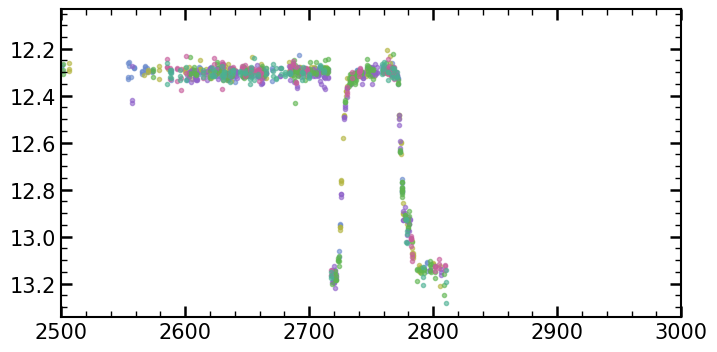

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax = plotparams(ax)

cams = dfg["Camera"]
camtype = np.unique(cams)
camnum = len(camtype)

for i in range(0,camnum):
    camdf = dfg.loc[dfg["Camera"] == camtype[i]].reset_index(drop=True)
    camjd = camdf["JD"].astype(float) - (2.458 * 10 ** 6)
    cammag = camdf["Mag"].astype(float)
    ax.scatter(camjd, cammag, color=colors[i], alpha=0.6, marker='.')

cams2 = dfv["Camera"]
camtype2 = np.unique(cams2)
camnum2 = len(camtype2)

for i in range(0,camnum2):
    camdf2 = dfv.loc[dfv["Camera"] == camtype2[i]].reset_index(drop=True)
    camjd2 = camdf2["JD"].astype(float) - (2.458 * 10 ** 6)
    cammag2 = camdf2["Mag"].astype(float) + 0.325
    ax.scatter(camjd2, cammag2, color=colors[i], alpha=0.6, marker='.')

ax.invert_yaxis()
ax.set_xlim(2500,3000)

In [6]:
df_fitting = dfg.loc[dfg.JD > 2580+(2.458 * 10 ** 6)].reset_index(drop=True)

df_baseline = df_fitting.loc[df_fitting.JD < 2700+(2.458 * 10 ** 6)].reset_index(drop=True)

df_fit = df_fitting.loc[df_fitting.JD > 2730+(2.458 * 10 ** 6)].reset_index(drop=True)
df_fit = df_fit.loc[df_fit.JD < 2770+(2.458 * 10 ** 6)].reset_index(drop=True)

In [7]:
x_val = df_baseline.JD
y_val = df_baseline.Mag

N=len(x_val)
sx=np.sum(x_val)
sy=np.sum(y_val)
sxy=np.sum(y_val*x_val)
sxx=np.sum(x_val**2)
delta=N*sxx-sx*sx

m_fit=(N*sxy-sx*sy)/(N*sxx-sx**2)
b_fit=(sy-m_fit*sx)/N

print("m_fit = ", m_fit, ", b_fit= ", b_fit)

sigma_m=N/delta
sigma_b=sxx/delta

print('sigma_m = ', np.sqrt(sigma_m), ", sigma_b = ", np.sqrt(sigma_b))

res_error=np.sum((y_val-m_fit*x_val-b_fit)**2)/N
print("Residual Error= ", res_error)

x_fit=np.arange(0, np.max(x_val)+1, 1.0) 
y_fit=m_fit*x_fit+b_fit

m_fit =  -3.0880113536745736e-06 , b_fit=  19.898826414562315
sigma_m =  0.0015123964613651803 , sigma_b =  3721.4713472359554
Residual Error=  0.0004678090730002581


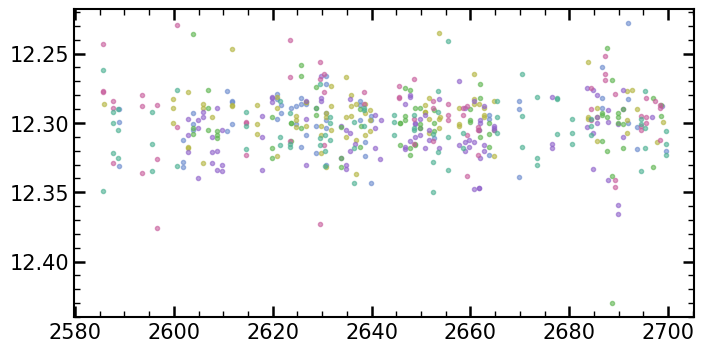

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax = plotparams(ax)

cams = df_baseline["Camera"]
camtype = np.unique(cams)
camnum = len(camtype)

for i in range(0,camnum):
    camdf = df_baseline.loc[df_baseline["Camera"] == camtype[i]].reset_index(drop=True)
    camjd = camdf["JD"].astype(float) - (2.458 * 10 ** 6)
    cammag = camdf["Mag"].astype(float)
    ax.scatter(camjd, cammag, color=colors[i], alpha=0.6, marker='.')

#ax.plot(x_fit,y_fit)

ax.invert_yaxis()

In [9]:
x_val = df_fit.JD
y_val = df_fit.Mag

N=len(x_val)
sx=np.sum(x_val)
sy=np.sum(y_val)
sxy=np.sum(y_val*x_val)
sxx=np.sum(x_val**2)
delta=N*sxx-sx*sx

m_fit=(N*sxy-sx*sy)/(N*sxx-sx**2)
b_fit=(sy-m_fit*sx)/N

print("m_fit = ", m_fit, ", b_fit= ", b_fit)

sigma_m=N/delta
sigma_b=sxx/delta

print('sigma_m = ', np.sqrt(sigma_m), ", sigma_b = ", np.sqrt(sigma_b))

res_error=np.sum((y_val-m_fit*x_val-b_fit)**2)/N
print("Residual Error= ", res_error)

x_fit=np.arange(0, np.max(x_val)+1, 1.0) 
y_fit=m_fit*x_fit+b_fit

m_fit =  -0.0012162187692299938 , b_fit=  3005.115237805345
sigma_m =  0.005550028593597854 , sigma_b =  13657.237181766961
Residual Error=  0.0004958345576101316


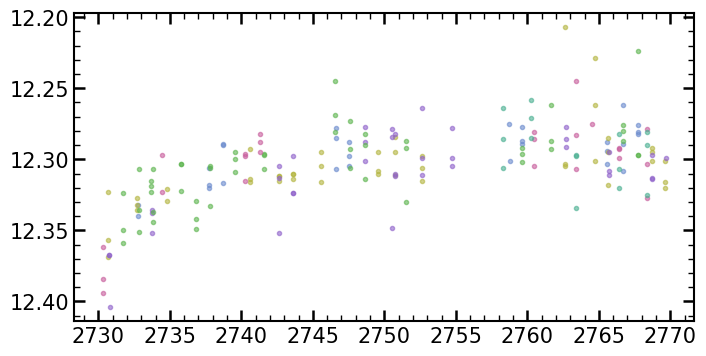

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax = plotparams(ax)

cams = df_fit["Camera"]
camtype = np.unique(cams)
camnum = len(camtype)

for i in range(0,camnum):
    camdf = df_fit.loc[df_fit["Camera"] == camtype[i]].reset_index(drop=True)
    camjd = camdf["JD"].astype(float) - (2.458 * 10 ** 6)
    cammag = camdf["Mag"].astype(float)
    ax.scatter(camjd, cammag, color=colors[i], alpha=0.6, marker='.')

ax.invert_yaxis()